In [1]:
import warnings
warnings.filterwarnings('ignore')

# Tokens, Tokenizer and Visualization





In [2]:
!pip install sentence-transformers transformers matplotlib scikit-learn --quiet

from transformers import GPT2Tokenizer, GPT2Model
import torch

# Load byte-level BPE tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained("gpt2")

text = "CAL has played a leading role in conducting research on language use."

tokens = tokenizer.tokenize(text)
input_ids = tokenizer.encode(text, return_tensors="pt")

print("Tokens:", tokens)
print("Token IDs:", input_ids)

with torch.no_grad():
    outputs = model(input_ids)
    hidden_states = outputs.last_hidden_state  # shape: [1, seq_len, hidden_dim]

print("Embedding shape:", hidden_states.shape)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.0 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Tokens: ['C', 'AL', 'Ġhas', 'Ġplayed', 'Ġa', 'Ġleading', 'Ġrole', 'Ġin', 'Ġconducting', 'Ġresearch', 'Ġon', 'Ġlanguage', 'Ġuse', '.']
Token IDs: tensor([[   34,  1847,   468,  2826,   257,  3756,  2597,   287, 14523,  2267,
           319,  3303,   779,    13]])
Embedding shape: torch.Size([1, 14, 768])


The Ġ (a special Unicode character U+0120) represents a space before the token.

GPT-2 uses Byte-Level Byte Pair Encoding (BPE) — which doesn't strip whitespace.

Instead of splitting on spaces like other tokenizers (e.g., WordPiece), it learns subwords that include space markers.

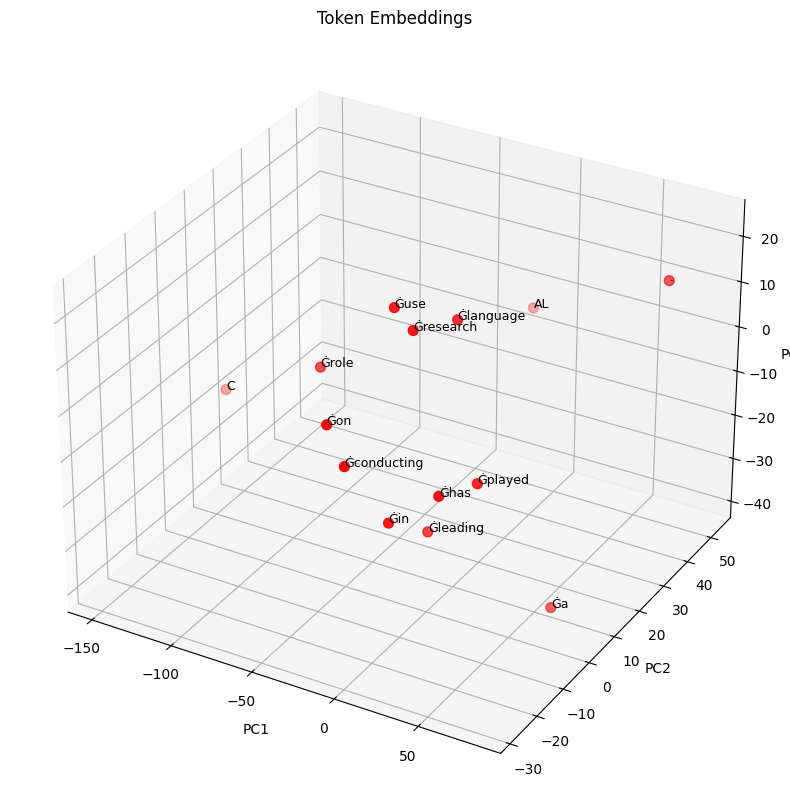

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

inputs = tokenizer(text, return_tensors="pt", return_attention_mask=True)
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

with torch.no_grad():
    outputs = model(**inputs)
    token_embeddings = outputs.last_hidden_state  # shape: [1, seq_len, hidden_dim]

pca = PCA(n_components=3)
reduced = pca.fit_transform(token_embeddings[0].numpy())

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = reduced[:, 0], reduced[:, 1], reduced[:, 2]
ax.scatter(xs, ys, zs, c='red', s=50)

for i, token in enumerate(tokens):
    ax.text(xs[i], ys[i], zs[i], token, fontsize=9)


ax.set_title("Token Embeddings")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()


# Sentence Embedding

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

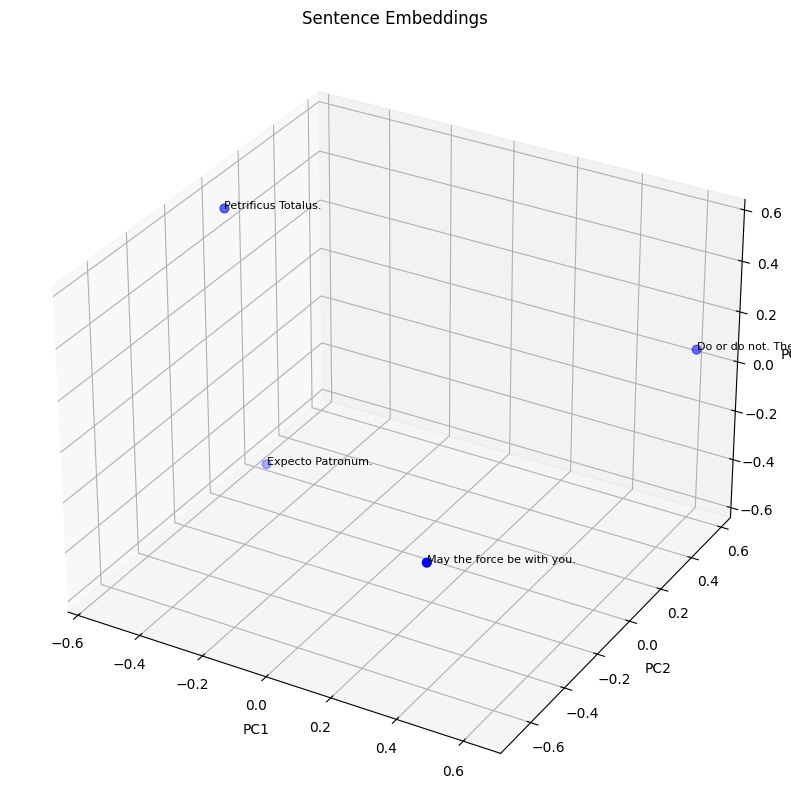

In [4]:
from sentence_transformers import SentenceTransformer

# model = SentenceTransformer("BAAI/bge-small-en-v1.5")
model = SentenceTransformer("all-MiniLM-L6-v2")
words = [
    "Do or do not. There is no try.",
    "May the force be with you.",
    "Expecto Patronum.",
    "Petrificus Totalus."
]
embeddings = model.encode(words)

pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2]
ax.scatter(xs, ys, zs, color='blue', s=40)

for i, word in enumerate(words):
    ax.text(xs[i], ys[i], zs[i], word, fontsize=8)
ax.set_title("Sentence Embeddings")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()


In [5]:
from transformers import AutoModel, AutoTokenizer

model = SentenceTransformer("BAAI/bge-small-en-v1.5")
# model = SentenceTransformer("all-MiniLM-L6-v2")
core_model = model._first_module().auto_model
print(core_model)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 384, padding_idx=0)
    (position_embeddings): Embedding(512, 384)
    (token_type_embeddings): Embedding(2, 384)
    (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [6]:
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")
print("\nSample Parameters:")
for name, param in list(model.named_parameters())[:5]:  # show first 5
    print(f"{name:60} shape={param.shape}")

Total Parameters: 33,360,000
Trainable Parameters: 33,360,000

Sample Parameters:
0.auto_model.embeddings.word_embeddings.weight               shape=torch.Size([30522, 384])
0.auto_model.embeddings.position_embeddings.weight           shape=torch.Size([512, 384])
0.auto_model.embeddings.token_type_embeddings.weight         shape=torch.Size([2, 384])
0.auto_model.embeddings.LayerNorm.weight                     shape=torch.Size([384])
0.auto_model.embeddings.LayerNorm.bias                       shape=torch.Size([384])


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


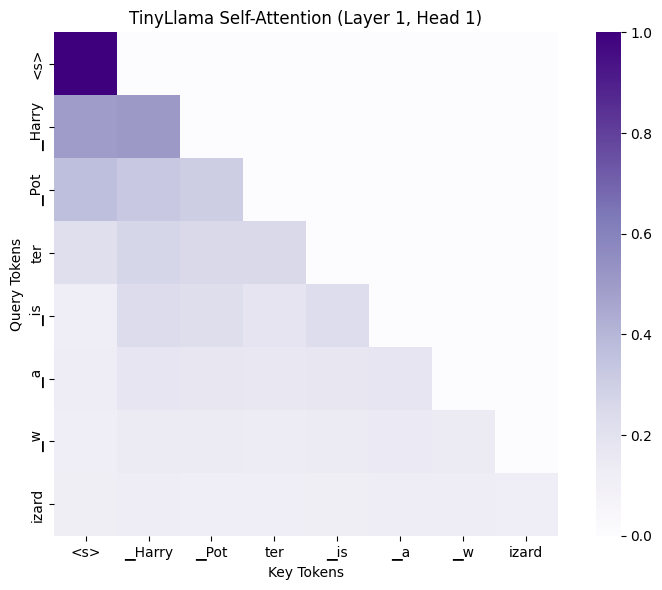

In [7]:

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForCausalLM

model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, output_attentions=True)
model.eval()

text = "Harry Potter is a wizard"
inputs = tokenizer(text, return_tensors="pt")


with torch.no_grad():
    outputs = model(**inputs)

attn = outputs.attentions[0][0, 0].detach().cpu()  # layer 0, head 0

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

plt.figure(figsize=(8, 6))
sns.heatmap(attn, xticklabels=tokens, yticklabels=tokens, cmap="Purples", square=True)
plt.title("TinyLlama Self-Attention (Layer 1, Head 1)")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.tight_layout()
plt.show()
